Imports

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

import os

Dataset Configuration

In [25]:
batch_size = 16


train_ds = tf.keras.utils.image_dataset_from_directory(
    os.getcwd() + '/Train',
    image_size=(128,128),
    batch_size=batch_size,
    label_mode = 'categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.getcwd() + '/Test',
    image_size=(128,128),
    batch_size=batch_size,
    label_mode = 'categorical'
)

Found 660 files belonging to 7 classes.
Found 207 files belonging to 7 classes.


Dataset Visualization

['Coffee', 'Corn', 'Eucalyptus', 'Goiaba', 'Orange', 'Soybean', 'Tomato']


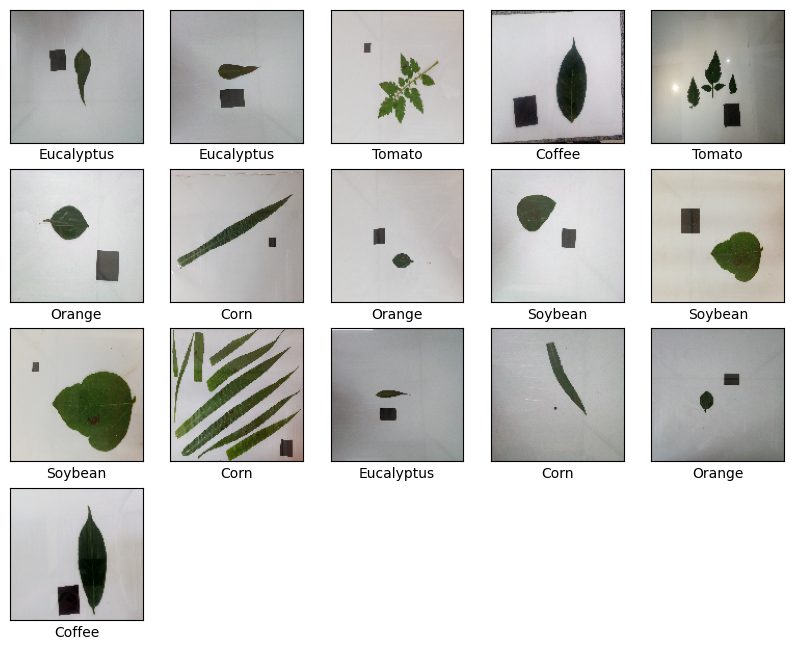

In [26]:
class_names = train_ds.class_names

print(class_names)

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.xlabel(class_names[tf.math.argmax(labels[i])])
  plt.show()

Normalizing Dataset

In [27]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

Model

In [28]:
image_shape = (128, 128, 3)
# image_shape = (1920, 2560, 3)

# # LeNet-5
# model = Sequential([
#             Conv2D(6, 5, activation='relu', input_shape=image_shape),
#             MaxPooling2D(strides=(2,2)),
#             Conv2D(16, 5, activation='relu'),
#             MaxPooling2D(strides=(2,2)),
#             Flatten(),
#             Dense(120, activation='relu'),
#             Dropout(0.5),
#             Dense(84, activation='relu'),
#             Dropout(0.5),
#             Dense(7, activation='softmax')
# ])

# AlexNet
model = Sequential([
            Conv2D(96, 11, strides=(4,4), activation='relu', input_shape=image_shape),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Conv2D(256, 5, padding='same', activation='relu'),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Conv2D(384, 3, padding='same', activation='relu'),
            Conv2D(384, 3, padding='same', activation='relu'),
            Conv2D(256, 3, padding='same', activation='relu'),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            Flatten(),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(7, activation='softmax')
])

# # VGG-16
# model = Sequential([
#             Conv2D(64, 3, padding='same', activation='relu', input_shape=image_shape),
#             Conv2D(64, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#             Conv2D(128, 3, padding='same', activation='relu'),
#             Conv2D(128, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             Conv2D(512, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#             Flatten(),
#             Dense(4096, activation='relu'),
#             Dropout(0.5),
#             Dense(4096, activation='relu'),
#             Dropout(0.5),
#             Dense(7, activation='softmax')
# ])

# # Inception
# model = Sequential([
#             Conv2D(64, 7, strides=(2,2), padding='same', activation='relu', input_shape=image_shape),
#             MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#             Conv2D(64, 1, activation='relu'),
#             Conv2D(192, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#             Conv2D(64, 1, activation='relu'),
#             Conv2D(128, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#             Conv2D(128, 1, activation='relu'),
#             Conv2D(192, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#             Conv2D(256, 1, activation='relu'),
#             Conv2D(384, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             Conv2D(256, 3, padding='same', activation='relu'),
#             MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#             Flatten(),
#             Dense(4096, activation='relu'),
#             Dropout(0.5),
#             Dense(4096, activation='relu'),
#             Dropout(0.5),
#             Dense(7, activation='softmax')
# ])


model.compile(optimizer=SGD(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,755,591 (94.44 MB)

 Trainable params: 24,755,591 (94.44 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING

In [29]:
history = model.fit(train_ds, epochs=30)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.1969 - loss: 4.9413
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.1958 - loss: 1.8979
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.2188 - loss: 1.8386
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.2979 - loss: 1.7770
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.2401 - loss: 1.9001
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.2991 - loss: 1.8428
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4032 - loss: 1.6298
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4247 - loss: 1.6651
Epoch 9/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.4845 - loss: 1.3874
Epoch 10/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5371 - loss: 1.3203
Epoch 11/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5195 - loss: 1.3097
Epoch 12/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step

Testing

In [30]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

print('\nTest accuracy:', test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4970 - loss: 1.6553

Test accuracy: 0.5314009785652161
